# 项目：清洗与分析数据

## 数据收集

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline

#from bs4 import BeautifulSoup

收集来自本地的*平面文件*

In [2]:
twitter = pd.read_csv('twitter_archive_enhanced.csv')

收集从互联网下载的文件

In [3]:
# 下载完成后将这段代码进行注释，防止反复下载。
# url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
# response = requests.get(url)
# file_name = url.split('/')[-1]
# with open(file_name, mode='wb') as file:
#    file.write(response.content)

In [4]:
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

由于无法访问Twitter，本项目直接使用课程提供的Twitter返回数据`tweet_json.txt`。每个推特的 *JSON* 数据应当写入单独一行。然后将这个 `.txt` 文件逐行读入一个 `pandas DataFrame` 中，至少包含 **tweet ID**、**retweet_count** 和 **favorite_count** 字段。

In [5]:
import json

In [6]:
tweet_list = []
with open('tweet_json.txt') as file:
    lines = file.readlines()
    for line in lines:
        line_json = json.loads(line)
        tweet_id = line_json['id_str']
        retweet_count = line_json['retweet_count']
        favorite_count = line_json['favorite_count']
        
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count})
extra = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## 数据评估

In [7]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
sum(twitter.tweet_id.duplicated())

0

In [10]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
sum(twitter.rating_numerator.value_counts())

2356

In [12]:
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
sum(twitter.rating_denominator.value_counts())

2356

In [14]:
twitter.iloc[2352]['text']

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [15]:
twitter.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Toby           7
an             7
Daisy          7
Bailey         7
Milo           6
Leo            6
Dave           6
Rusty          6
Koda           6
Bella          6
Jax            6
Jack           6
Oscar          6
Scout          6
Stanley        6
Sunny          5
            ... 
Aldrick        1
Crumpet        1
Jaycob         1
Ambrose        1
Sparky         1
Eugene         1
Tanner         1
Maya           1
Cermet         1
Ricky          1
Rumble         1
Henry          1
Kallie         1
Durg           1
Torque         1
Charleson      1
Nico           1
Striker        1
Laela          1
Yukon          1
Emma           1
Gerbald        1
Lillie         1
Lorelei        1
Georgie        1
Hermione       1
Rose           1
Ruffles       

In [16]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1318,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,Pekinese,0.596882,True,Maltese_dog,0.176478,True,Great_Pyrenees,0.026775,True
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [18]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
extra.sample(5)

,tweet_id,retweet_count,favorite_count
216,850145622816686080,4224,17454
322,833863086058651648,2717,14594
866,761672994376806400,33230,54793
2215,668496999348633600,145,435
2062,671147085991960577,251,708


In [20]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**质量问题**

*twitter*
- tweet_id列值得类型为int，extra中tweet_id列的值为str（一致性问题）
- in_reply_to_status_id、in_reply_to_user_id等列含有缺失值（完整性问题）
- timestamp列的值类型为str（一致性问题）
- retweeted_status_timestamp列的值类型为str（一致性问题）
- name列中包含None、a、an、the等值（有效性问题）
- rating_denominator列中存在非10的值，而且出现次数非常少（有效性问题）
- rating_numerator列中有一些值仅出现1至2次，应该是错误值（准确性问题和有效性问题）

*prediction*
- tweet_id列值得类型为int，extra中tweet_id列的值为str（一致性问题）
- p1、p2、p3的值大小写不一致（一致性问题）

**整洁度问题**

*twitter*
- doggo、floofer、pupper、puppo是同一种分类变量，但是占据了四个列

*extra*
- retweet_count、favorite_count是twitter_clean表格的一部分

## 数据清理
首先建立三个数据集的副本

In [21]:
twitter_clean = twitter.copy()
prediction_clean = prediction.copy()
extra_clean = extra.copy()

### 缺失数据
in_reply_to_status_id、in_reply_to_user_id等列含有缺失值（完整性问题）

**定义**

去掉大部分值为空值的列 *in_reply_to_status_id*，*in_reply_to_user_id*，*retweeted_status_id*，*retweeted_status_user_id*，*retweeted_status_timestamp*

去掉 *expanded_urls* 列中含有空值的行

**代码**

In [22]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis=1)

In [23]:
twitter_clean = twitter_clean.dropna()

**测试**

In [24]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### 一致性问题
*twitter*
- tweet_id列值得类型为int，extra_clean中tweet_id列的值为str
- timestamp列的值类型为str
- retweeted_status_timestamp列的值类型为str

*prediction*
- tweet_id列值得类型为int，extra_clean中tweet_id列的值为str
- p1、p2、p3的值大小写不一致

**定义**

*twitter*
- 将tweet_id列值的类型改为str
- 将timestamp列的值类型改为datetime，并分成year，month，day，hour四列，而后删除timestamp列

*prediction*
- 将tweet_id列值的类型改为str
- p1、p2、p3的值全部改为小写字母

**编码**

In [25]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)
prediction_clean.p1 = prediction_clean.p1.apply(lambda x: x.lower())
prediction_clean.p2 = prediction_clean.p2.apply(lambda x: x.lower())
prediction_clean.p3 = prediction_clean.p3.apply(lambda x: x.lower())

In [26]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

In [27]:
twitter_clean['year'] = twitter_clean.timestamp.apply(lambda x: str(x.date()).split('-')[0])
twitter_clean['month'] = twitter_clean.timestamp.apply(lambda x: str(x.date()).split('-')[1])
twitter_clean['day'] = twitter_clean.timestamp.apply(lambda x: str(x.date()).split('-')[2])
twitter_clean['hour'] = twitter_clean.timestamp.apply(lambda x: str(x.time()).split(':')[0])
twitter_clean.drop(['timestamp'], axis=1, inplace=True)

**测试**

In [28]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
year                  2297 non-null object
month                 2297 non-null object
day                   2297 non-null object
hour                  2297 non-null object
dtypes: int64(2), object(13)
memory usage: 287.1+ KB


In [29]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 有效性问题
*twitter*
- name列中包含None、a、an、the等值
- rating_denominator列中存在非10的值，而且出现次数非常少
- rating_numerator列中有一些值仅出现1至2次，应该是错误值

**定义**

*twitter*
- name列中的None、a、an、the等值替换为Unnamed
- rating_denominator列的值均改为10
- 调整rating_numerator列中出现次数少于3的值，如果是三位数除以100，两位数除以10，结果不保留小数位

**编码**

In [31]:
error_list = ['None', 'a', 'an', 'the']
for word in error_list:
    twitter_clean.name.replace(word, 'Unnamed', inplace=True)

In [32]:
twitter_clean.rating_denominator = twitter_clean.rating_denominator.apply(lambda x: 10)

In [33]:
series = twitter_clean.rating_numerator.value_counts()
index = series.index.tolist()
dict_numer = {}
for i,value in enumerate(series):
    key = str(index[i])
    dict_numer[key] = value

In [34]:
def numerator(df):
    if dict_numer[str(df['rating_numerator'])] <= 2:
        if df['rating_numerator'] > 400:
            return int(df['rating_numerator']/100)
        else:
            return int(df['rating_numerator']/10)
    else:
        return df['rating_numerator']
twitter_clean.rating_numerator = twitter_clean.apply(numerator, axis=1)

**测试**

In [35]:
twitter_clean.name.value_counts()

Unnamed      756
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
Bailey         7
Buddy          7
Daisy          7
Toby           7
Stanley        6
Leo            6
Rusty          6
Oscar          6
Milo           6
Jax            6
Bella          6
Jack           6
Koda           6
Dave           6
Scout          6
Larry          5
Alfie          5
George         5
Finn           5
            ... 
Aldrick        1
Crumpet        1
Jaycob         1
Ambrose        1
Sparky         1
Eugene         1
Tanner         1
Maya           1
Cermet         1
Ricky          1
Rumble         1
Henry          1
Kallie         1
Durg           1
Torque         1
Charleson      1
Nico           1
Striker        1
Laela          1
Yukon          1
Emma           1
Gerbald        1
Lillie         1
Lorelei        1
Georgie        1
Hermione       1
Rose           1
Ruffles       

In [36]:
twitter_clean.rating_denominator.value_counts()

10    2297
Name: rating_denominator, dtype: int64

In [37]:
twitter_clean.rating_numerator.value_counts()

12    548
11    455
10    455
13    339
9     157
8     105
7      55
14     52
5      36
6      33
4      19
3      19
2      12
1       7
0       2
17      1
20      1
16      1
Name: rating_numerator, dtype: int64

### 整洁度问题

*twitter*
- doggo、floofer、pupper、puppo是同一种分类变量，但是占据了四个列

*extra*
- retweet_count、favorite_count是twitter_clean表格的一部分

**定义**
- 将doggo、floofer、pupper、puppo作为分类变量放入一列，列名称为level，没有定义狗“地位”的赋值Nolevel
- 将 extra 合并到 twitter 中

**编码**

In [38]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
year                  2297 non-null object
month                 2297 non-null object
day                   2297 non-null object
hour                  2297 non-null object
dtypes: int64(2), object(13)
memory usage: 287.1+ KB


In [39]:
twitter_clean['Nolevel'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo
twitter_clean.Nolevel = twitter_clean.Nolevel.apply(lambda x: 'Nolevel' if x=='NoneNoneNoneNone' else 'None')
twitter_clean = pd.melt(twitter_clean, id_vars=['tweet_id','source','text','expanded_urls','rating_numerator',
                                                'rating_denominator','name','year','month','day','hour'], var_name='level')
twitter_clean = twitter_clean[twitter_clean.value != 'None']
twitter_clean = twitter_clean[~(twitter_clean.tweet_id.duplicated())]
twitter_clean.drop(['value'], axis=1, inplace=True)

In [40]:
twitter_clean = pd.merge(twitter_clean, extra_clean, on=['tweet_id'], how='left')
twitter_clean.dropna(inplace=True)

**测试**

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 14 columns):
tweet_id              2293 non-null object
source                2293 non-null object
text                  2293 non-null object
expanded_urls         2293 non-null object
rating_numerator      2293 non-null int64
rating_denominator    2293 non-null int64
name                  2293 non-null object
year                  2293 non-null object
month                 2293 non-null object
day                   2293 non-null object
hour                  2293 non-null object
level                 2293 non-null object
retweet_count         2293 non-null float64
favorite_count        2293 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 268.7+ KB


In [42]:
twitter_clean.sample(20)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,hour,level,retweet_count,favorite_count
953,781524693396357120,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,https://twitter.com/dog_rates/status/781524693...,12,10,Unnamed,2016,09,29,16,Nolevel,6383.0,23074.0
2153,668614819948453888,"<a href=""http://twitter.com/download/iphone"" r...",Here is a horned dog. Much grace. Can jump ove...,https://twitter.com/dog_rates/status/668614819...,7,10,Unnamed,2015,11,23,02,Nolevel,340.0,649.0
1746,679158373988876288,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,2015,12,22,04,Nolevel,9140.0,23469.0
1671,683857920510050305,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10,10,Sadie,2016,01,04,03,Nolevel,1260.0,4146.0
933,785264754247995392,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,2016,10,09,23,Nolevel,1897.0,8095.0
2272,666353288456101888,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,https://twitter.com/dog_rates/status/666353288...,8,10,Unnamed,2015,11,16,20,Nolevel,76.0,228.0
948,782722598790725632,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She fought a bee and the bee wo...,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,2016,10,02,23,Nolevel,6201.0,19173.0
1830,675781562965868544,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,https://twitter.com/dog_rates/status/675781562...,11,10,Buddah,2015,12,12,20,Nolevel,531.0,1741.0
679,827653905312006145,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,https://twitter.com/dog_rates/status/827653905...,12,10,Boots,2017,02,03,23,Nolevel,3414.0,16917.0
7,855851453814013952,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,Unnamed,2017,04,22,18,doggo,19118.0,47679.0


## 保存清理后的数据

In [43]:
twitter_clean = twitter_clean.reset_index().drop(['index'], axis=1)
twitter_clean.to_csv('twitter_clean.csv', index=False)
prediction_clean.to_csv('prediction_clean.csv', index=False)

## 数据分析和可视化

In [44]:
twitter_clean = pd.read_csv('twitter_clean.csv')
prediction_clean = pd.read_csv('prediction_clean.csv')

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
tweet_id              2293 non-null int64
source                2293 non-null object
text                  2293 non-null object
expanded_urls         2293 non-null object
rating_numerator      2293 non-null int64
rating_denominator    2293 non-null int64
name                  2293 non-null object
year                  2293 non-null int64
month                 2293 non-null int64
day                   2293 non-null int64
hour                  2293 non-null int64
level                 2293 non-null object
retweet_count         2293 non-null float64
favorite_count        2293 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 250.9+ KB


In [46]:
twitter_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,hour,level,retweet_count,favorite_count
0,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017,7,26,15,doggo,7684.0,32467.0
1,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017,7,9,21,doggo,3099.0,20719.0
2,872967104147763200,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,Unnamed,2017,6,9,0,doggo,5632.0,27918.0
3,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2017,6,4,23,doggo,3608.0,20687.0
4,871102520638267392,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,Unnamed,2017,6,3,20,doggo,5729.0,21403.0


In [47]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**分析四个问题**
- 哪个品种的狗评分最高，转发数和点赞数更多(取前五名)
- 哪个品种的狗出现的频率最高(取前五名)
- 有名字的狗和没有被命名的狗，哪一类的转发数和点赞数更多
- 哪一个时间段twitter的活跃度更高（取前五名）

### 问题一：哪个品种的狗评分最高，转发数和点赞数更多(取前五名)

In [49]:
breed_score = pd.merge(prediction_clean[['tweet_id','p1','p1_conf','p1_dog']], 
                       twitter_clean[['tweet_id', 'rating_numerator', 'name', 'retweet_count','favorite_count']],
                       on=['tweet_id'], how='left')

In [50]:
breed_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 8 columns):
tweet_id            2075 non-null int64
p1                  2075 non-null object
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
rating_numerator    2073 non-null float64
name                2073 non-null object
retweet_count       2073 non-null float64
favorite_count      2073 non-null float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 131.7+ KB


In [51]:
breed_score.head()

,tweet_id,p1,p1_conf,p1_dog,rating_numerator,name,retweet_count,favorite_count
0,666020888022790149,welsh_springer_spaniel,0.465074,True,8.0,Unnamed,530.0,2528.0
1,666029285002620928,redbone,0.506826,True,7.0,Unnamed,48.0,132.0
2,666033412701032449,german_shepherd,0.596461,True,9.0,Unnamed,47.0,128.0
3,666044226329800704,rhodesian_ridgeback,0.408143,True,6.0,Unnamed,147.0,309.0
4,666049248165822465,miniature_pinscher,0.560311,True,5.0,Unnamed,41.0,111.0


In [52]:
breed_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 8 columns):
tweet_id            2075 non-null int64
p1                  2075 non-null object
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
rating_numerator    2073 non-null float64
name                2073 non-null object
retweet_count       2073 non-null float64
favorite_count      2073 non-null float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 131.7+ KB


In [53]:
breed_score = breed_score[breed_score.p1_dog==True]

In [54]:
breed_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 8 columns):
tweet_id            1532 non-null int64
p1                  1532 non-null object
p1_conf             1532 non-null float64
p1_dog              1532 non-null bool
rating_numerator    1531 non-null float64
name                1531 non-null object
retweet_count       1531 non-null float64
favorite_count      1531 non-null float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 97.2+ KB


In [55]:
rating_score = breed_score.groupby(['p1'])['rating_numerator'].mean()

In [56]:
rating_top5 = rating_score.sort_values(ascending=False).head(7)
rating_top5

p1
saluki                12.500000
tibetan_mastiff       12.400000
briard                12.333333
border_terrier        12.142857
giant_schnauzer       12.000000
silky_terrier         12.000000
standard_schnauzer    12.000000
Name: rating_numerator, dtype: float64

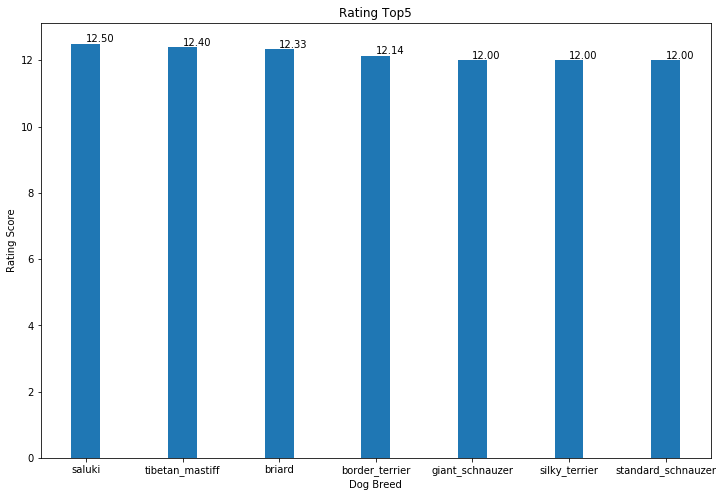

In [57]:
plt.figure(figsize=(12, 8))
plt.title("Rating Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Rating Score')
X = rating_top5.index.values
Y = rating_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.05, "%.2f" %y)

评分最高的前5名分别是：
- 第一名 saluki，12.5分
- 第二名 tibetan_mastiff，12.4分
- 第三名 briard，12.33分               
- 第四名 border_terrier，12.14分        
- 并列第五名 giant_schnauzer、silky_terrier、standard_schnauzer，12分

In [58]:
retweet_score = breed_score.groupby(['p1'])['retweet_count'].sum()
retweet_top5 = retweet_score.sort_values(ascending=False).head()
retweet_top5

p1
golden_retriever      583777.0
labrador_retriever    424954.0
chihuahua             302618.0
pembroke              278975.0
samoyed               211249.0
Name: retweet_count, dtype: float64

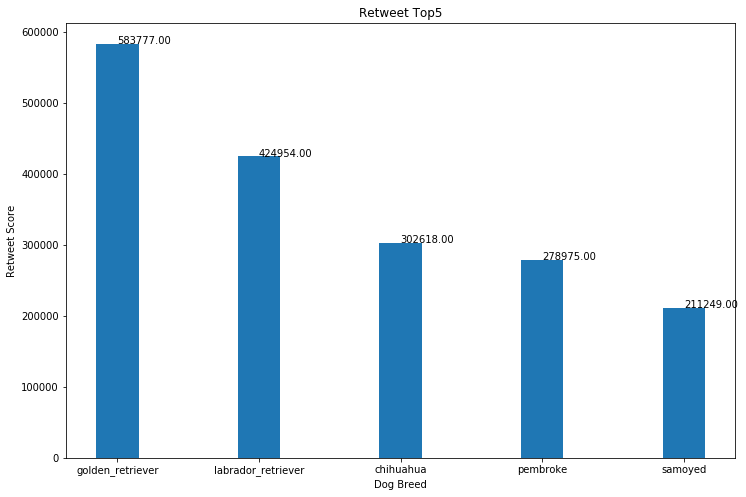

In [59]:
plt.figure(figsize=(12, 8))
plt.title("Retweet Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Score')
X = retweet_top5.index.values
Y = retweet_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

转发数最高的前5名分别是：
- 第一名golden_retriever，583777.0
- 第二名labrador_retriever，424954.0
- 第三名chihuahua，302618.0
- 第四名pembroke，278975.0
- 第五名samoyed，211249.0

In [60]:
favorite_score = breed_score.groupby(['p1'])['favorite_count'].sum()
favorite_top5 = favorite_score.sort_values(ascending=False).head()
favorite_top5

p1
golden_retriever      1707334.0
labrador_retriever    1119555.0
pembroke               991762.0
chihuahua              673987.0
samoyed                541345.0
Name: favorite_count, dtype: float64

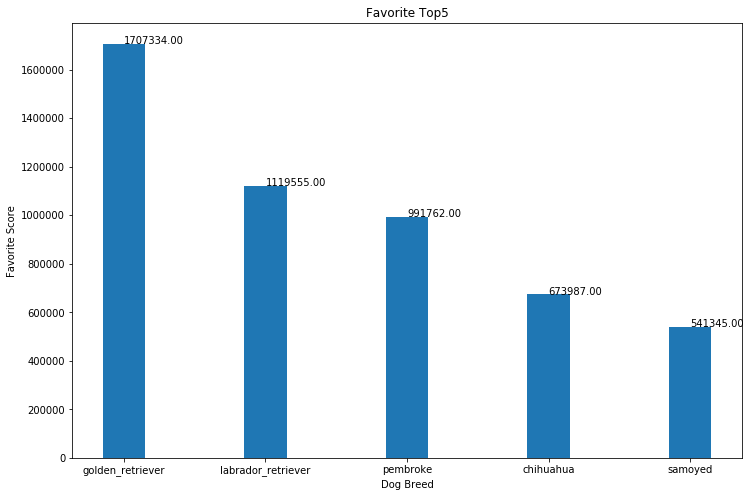

In [61]:
plt.figure(figsize=(12, 8))
plt.title("Favorite Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Score')
X = favorite_top5.index.values
Y = favorite_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

点赞数最高的前5名分别是：
- 第一名golden_retriever，1707334.0
- 第二名labrador_retriever，1119555.0
- 第三名pembroke，991762.0
- 第四名chihuahua，673987.0
- 第五名samoyed，541345.0

### 问题二：哪个品种的狗出现的频率最高

In [62]:
breed_score.head()

,tweet_id,p1,p1_conf,p1_dog,rating_numerator,name,retweet_count,favorite_count
0,666020888022790149,welsh_springer_spaniel,0.465074,True,8.0,Unnamed,530.0,2528.0
1,666029285002620928,redbone,0.506826,True,7.0,Unnamed,48.0,132.0
2,666033412701032449,german_shepherd,0.596461,True,9.0,Unnamed,47.0,128.0
3,666044226329800704,rhodesian_ridgeback,0.408143,True,6.0,Unnamed,147.0,309.0
4,666049248165822465,miniature_pinscher,0.560311,True,5.0,Unnamed,41.0,111.0


In [63]:
fashion_top5 = breed_score.groupby(['p1'])['tweet_id'].count().sort_values(ascending=False).head(5)
fashion_top5

p1
golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: tweet_id, dtype: int64

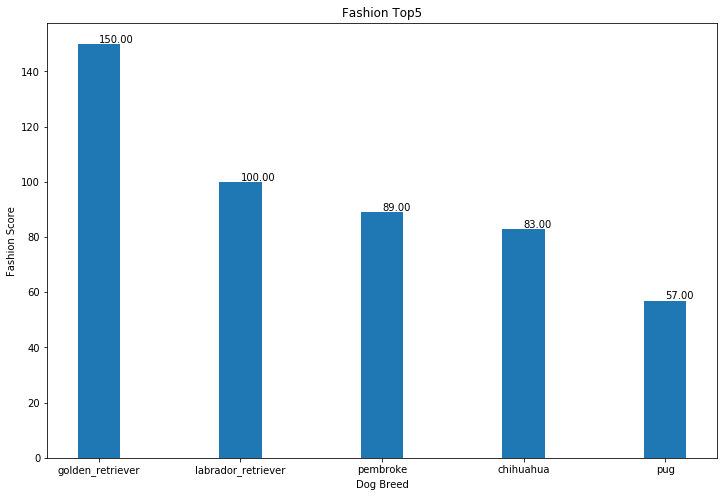

In [64]:
plt.figure(figsize=(12, 8))
plt.title("Fashion Top5")
plt.xlabel('Dog Breed')
plt.ylabel('Fashion Score')
X = fashion_top5.index.values
Y = fashion_top5.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

出现频率最高的前5名分别是：
- golden_retriever，150
- labrador_retriever，100
- pembroke，89
- chihuahua，83
- pug，57

### 问题三：有名字的狗和没有被命名的狗，哪一类的转发数和点赞数更多

In [65]:
breed_score['name'] = breed_score['name'].apply(lambda x: 'Named' if x!='Unnamed' else x)

In [66]:
table1 = breed_score.groupby(['name'])[['retweet_count','favorite_count']].sum()
table1

,retweet_count,favorite_count
name,,
Named,3321008.0,10384141.0
Unnamed,1255867.0,3345189.0


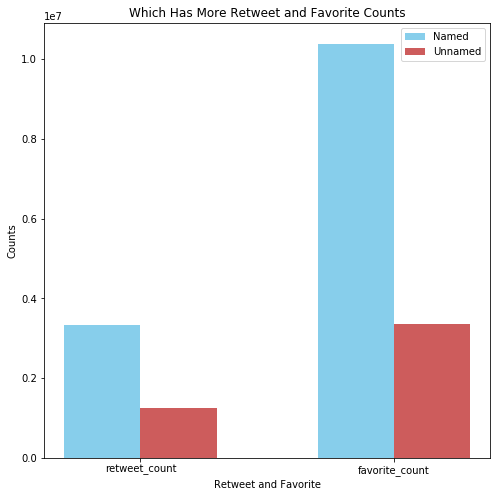

In [67]:
plt.figure(figsize=(8,8))
plt.title('Which Has More Retweet and Favorite Counts')
plt.xlabel('Retweet and Favorite')
plt.ylabel('Counts')

name_list = table1.columns.tolist()
named = table1.loc['Named'].values
unnamed = table1.loc['Unnamed'].values
ind = np.arange(len(named))  # the x locations for the groups
width = 0.3  # the width of the bars

plt.bar(ind-width/2, named, width, color='SkyBlue', label='Named')
plt.bar(ind+width/2, unnamed, width, color='IndianRed', label='Unnamed')
plt.xticks(ind, name_list)
plt.legend()

有名字的狗的转发数和点赞数都要高于没有名字的狗。

### 问题四：一天中哪一个时间段twitter的活跃度更高（取前五名）

In [68]:
activity_hour = twitter_clean.groupby(['hour'])['tweet_id'].count().sort_values(ascending=False).head()
activity_hour

hour
1     321
0     285
2     250
16    210
3     197
Name: tweet_id, dtype: int64

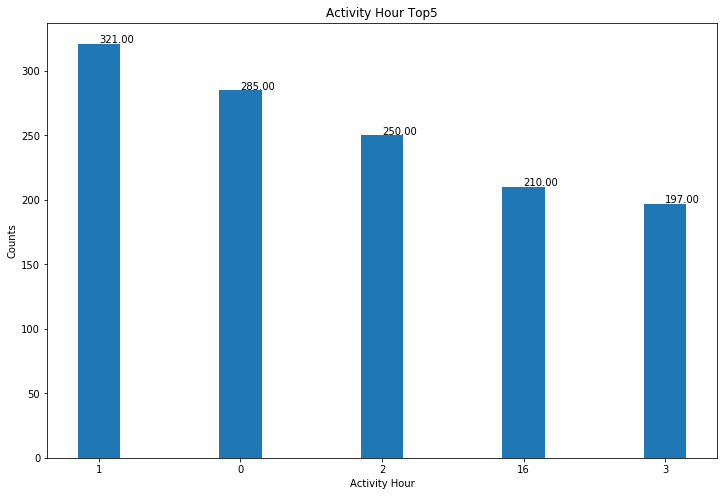

In [69]:
plt.figure(figsize=(12, 8))
plt.title("Activity Hour Top5")
plt.xlabel('Activity Hour')
plt.ylabel('Counts')
X = activity_hour.index.values.astype(str)
Y = activity_hour.values
plt.bar(X, Y, width=0.3)
for i,(x,y) in enumerate(zip(X, Y)):
    plt.text(x, y+0.5, "%.2f" %y)

一天中用户活跃度最高的时间的前五名分别是：
- 1:00，321
- 0:00，285
- 2:00，250
- 16:00，210
- 3:00，197

In [70]:
table_named = breed_score[breed_score.name=='Named']
table_unnamed = breed_score[breed_score.name=='Unnamed']

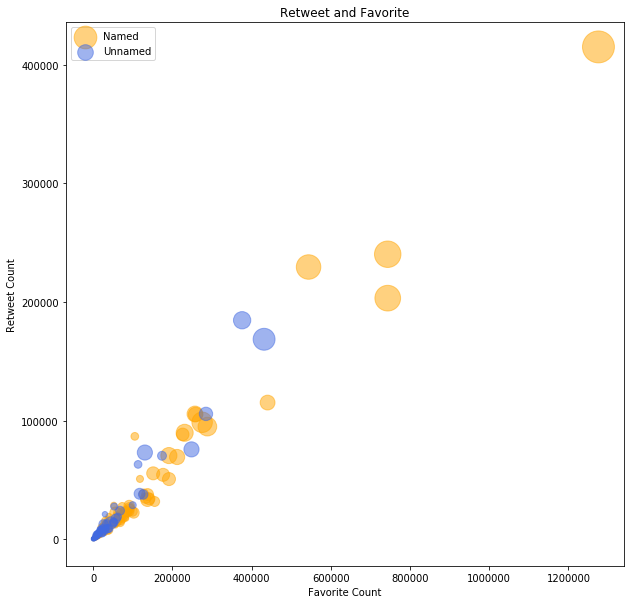

In [71]:
plt.figure(figsize=(10,10))
plt.title('Retweet and Favorite')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

x_named = table_named.groupby(['p1'])['favorite_count'].sum()
y_named = table_named.groupby(['p1'])['retweet_count'].sum()
area_named = table_named.groupby(['p1'])['tweet_id'].count()*10
plt.scatter(x_named, y_named, s=area_named, c='orange', alpha=0.5, label='Named')

x_unnamed = table_unnamed.groupby(['p1'])['favorite_count'].sum()
y_unnamed = table_unnamed.groupby(['p1'])['retweet_count'].sum()
area_unnamed = table_unnamed.groupby(['p1'])['tweet_id'].count()*10
plt.scatter(x_unnamed, y_unnamed, s=area_unnamed, c='royalblue', alpha=0.5, label='Unnamed')

plt.legend()

通过上图能够看出
- 点赞数和转发数大体上呈正相关趋势。
- 圆圈的大小代表出现的次数。出现次数较多的狗，favorite和retweet值也相应增加。
- 从分布上看，未命名的狗点赞数和转发数要少于有名字的狗。其中一个原因可能是有名字的狗受到的照料要好于未命名的狗，外观上可能更容易引人喜欢。